In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee'])

# Increase font sizes manually
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

import warnings
warnings.filterwarnings('ignore')

In [20]:
df_kenji = pd.read_csv('../data_collection/generated_data/kenji/all_data.csv')
df_clara = pd.read_csv('../data_collection/generated_data/clara/all_data.csv')
df_aimen = pd.read_csv('../data_collection/generated_data/aimen/all_data.csv')

# Tag and combine
df_kenji['participant'] = 'Participant 1'
df_clara['participant'] = 'Participant 2'
df_aimen['participant'] = 'Participant 3'
df = pd.concat([df_kenji, df_clara, df_aimen], ignore_index=True)

df.head()

timestamp  heart_rate  x_coordinate  y_coordinate  \
0  2025-06-12 09:56:57        77.0    343.866667    293.600000   
1  2025-06-12 09:56:58        77.0    346.580645    294.451613   
2  2025-06-12 09:56:59        77.5    349.413793    293.068966   
3  2025-06-12 09:57:00        78.0    352.580645    291.870968   
4  2025-06-12 09:57:01        78.6    343.862069    292.689655   

   pupil_diameter_mm  iris_diameter_mm  pupil_iris_ratio   genre participant  
0           0.804545              11.8          0.068182  comedy       aimen  
1           0.804545              11.8          0.068182  comedy       aimen  
2           0.800366              11.8          0.067828  comedy       aimen  
3           0.796187              11.8          0.067473  comedy       aimen  
4           0.792007              11.8          0.067119  comedy       aimen

## Missing Values

In [21]:
# Define columns where 0 likely means missing
zero_is_missing = [
    'heart_rate',
    'pupil_diameter_mm',
    'iris_diameter_mm',
    'pupil_iris_ratio',
    'x_coordinate',
    'y_coordinate'
]

# Combine NaN and zero checks
missing_percent = df.isnull().mean()

for col in zero_is_missing:
    if col in df.columns:
        missing_percent[col] += (df[col] == 0).mean()

# Filter and sort
missing = missing_percent[missing_percent > 0].sort_values()
missing_df = missing.reset_index()
missing_df.columns = ['feature', 'missing_percent']
missing_df

Empty DataFrame
Columns: [feature, missing_percent]
Index: []

## Heart Rate

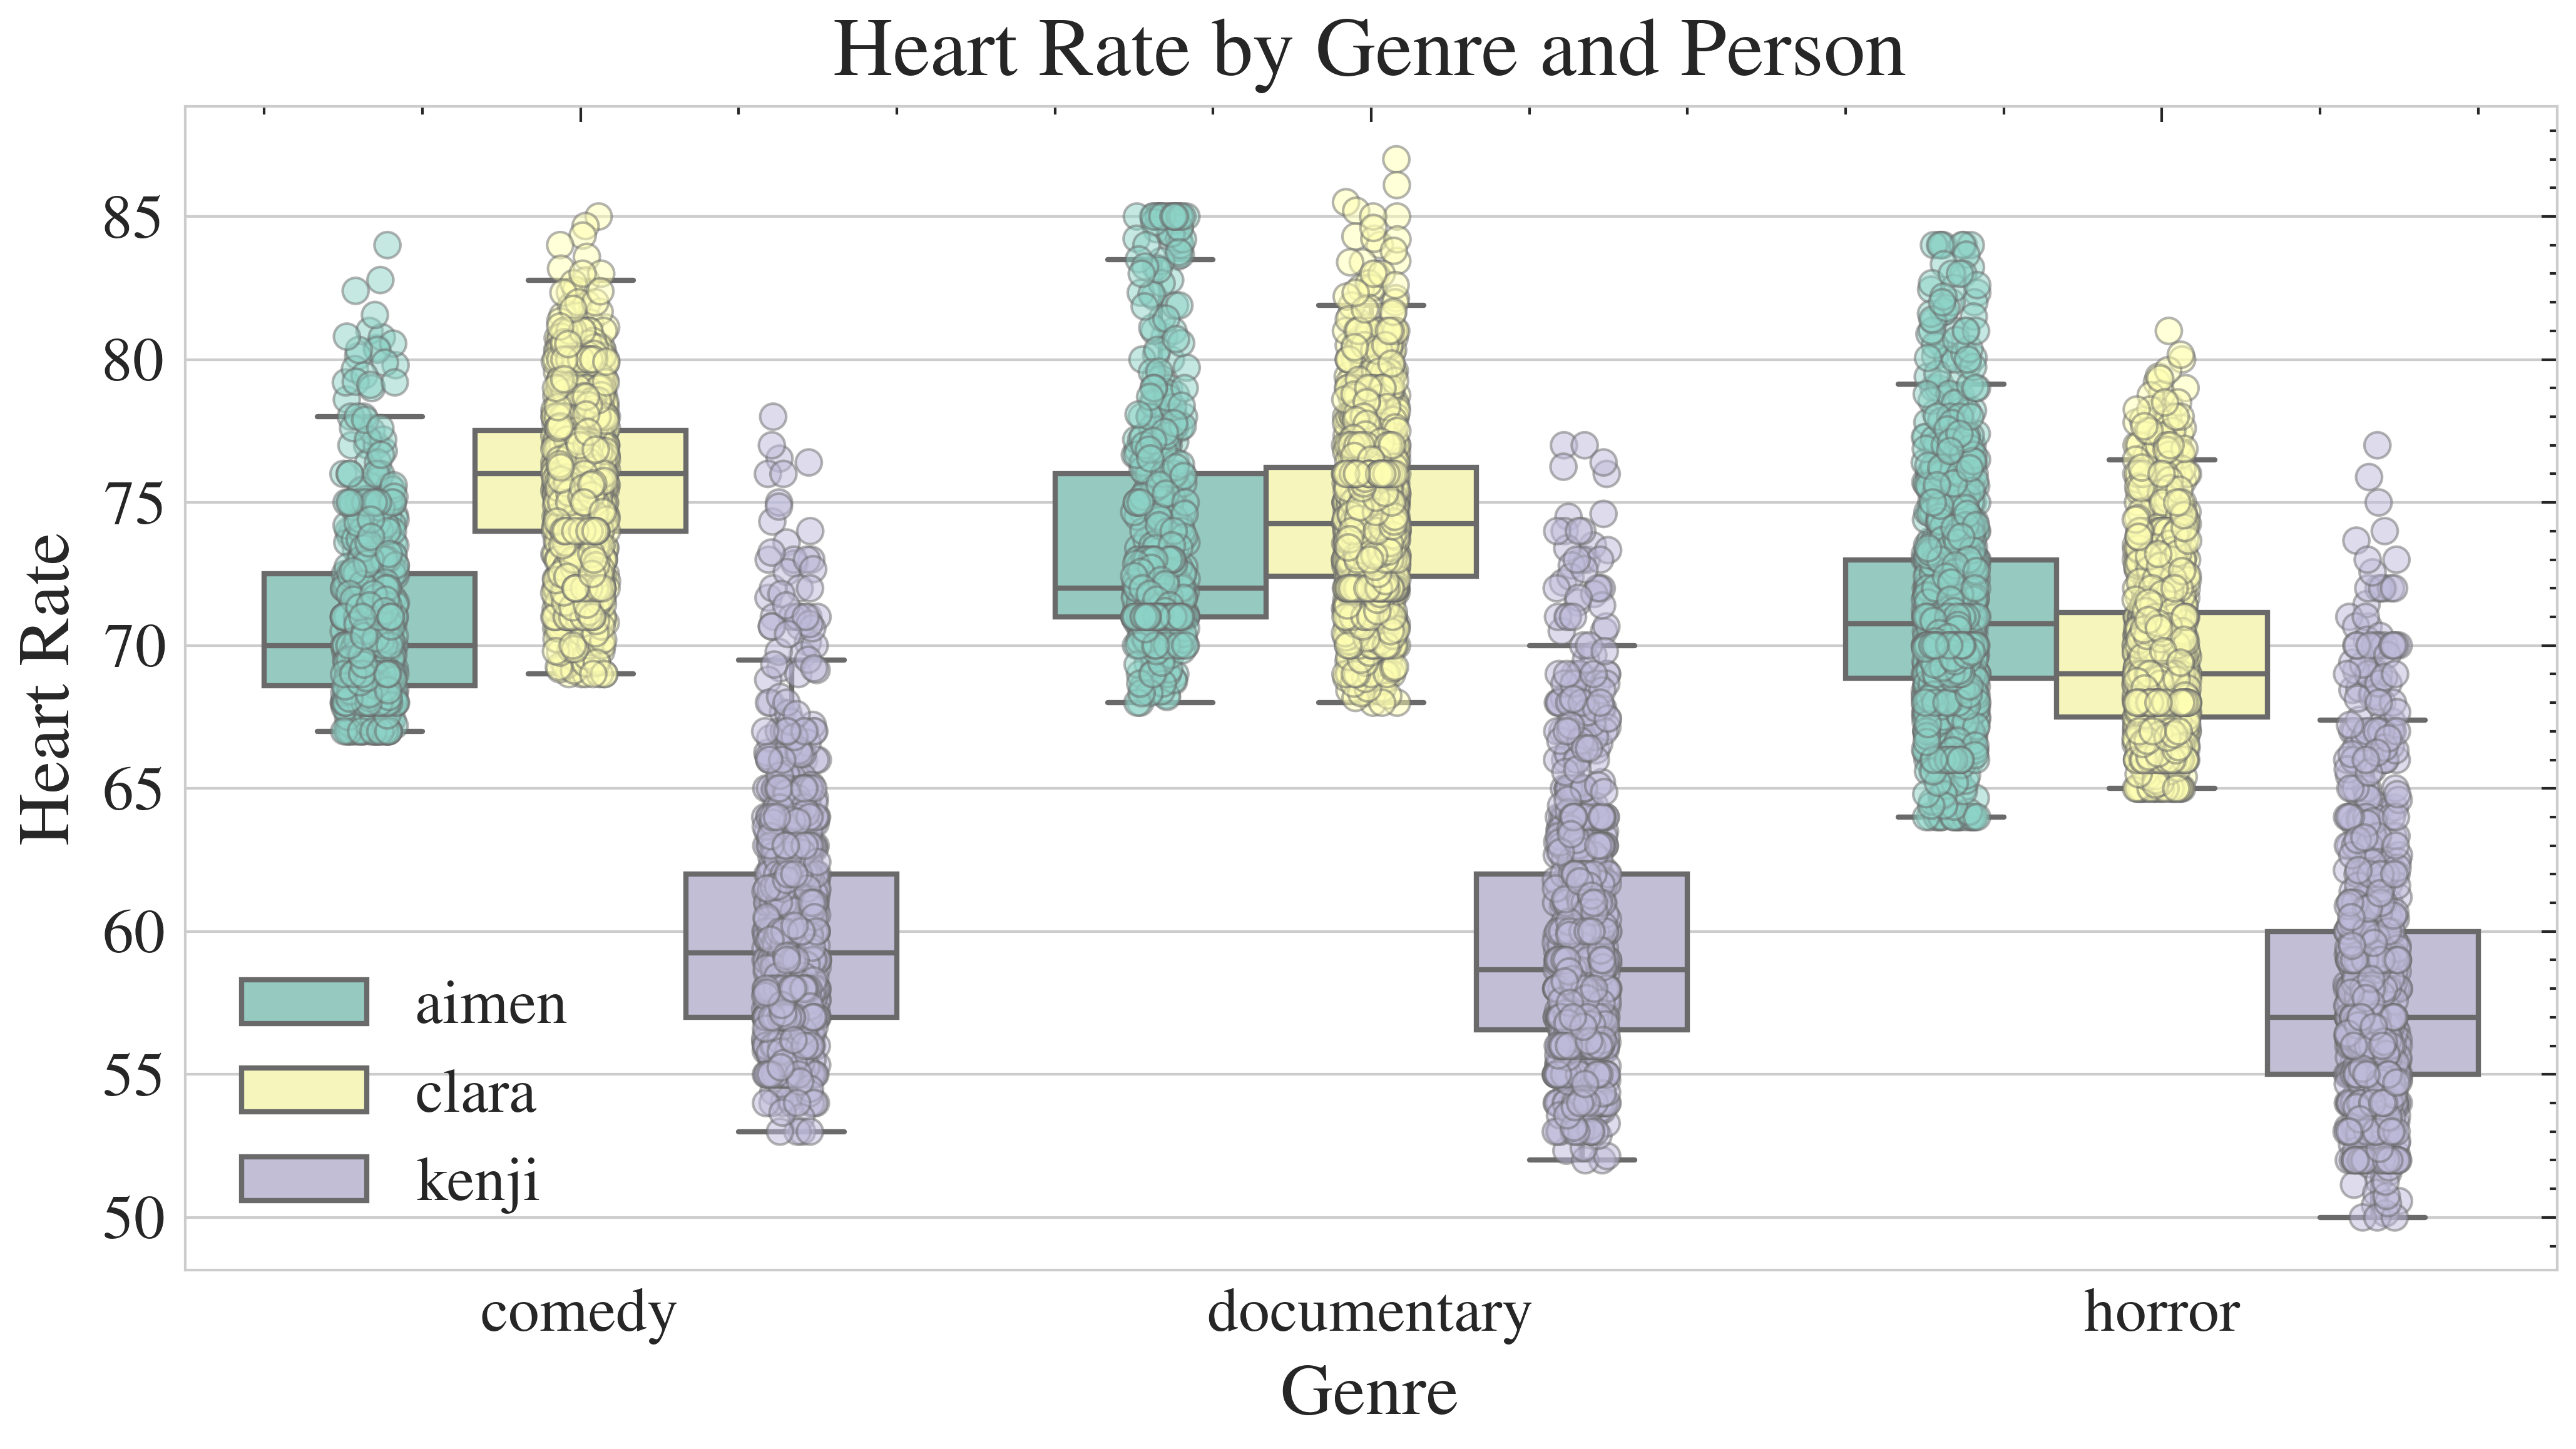

In [22]:
plt.figure(figsize=(7, 4))

# Plot boxplot
sns.boxplot(
    data=df,
    x='genre',
    y='heart_rate',
    hue='participant',
    palette='Set3',
    showfliers=False
)

# Plot stripplot
strip = sns.stripplot(
    data=df,
    x='genre',
    y='heart_rate',
    hue='participant',
    dodge=True,
    palette='Set3',
    alpha=0.5,
    linewidth=0.5,
    edgecolor='gray'
)

# Remove the second legend
handles, labels = strip.get_legend_handles_labels()
plt.legend(handles[:len(df['participant'].unique())], labels[:len(df['participant'].unique())])

plt.title('Heart Rate by Genre and Person')
plt.xlabel('Genre')
plt.ylabel('Heart Rate')
plt.tight_layout()


## Head Movement

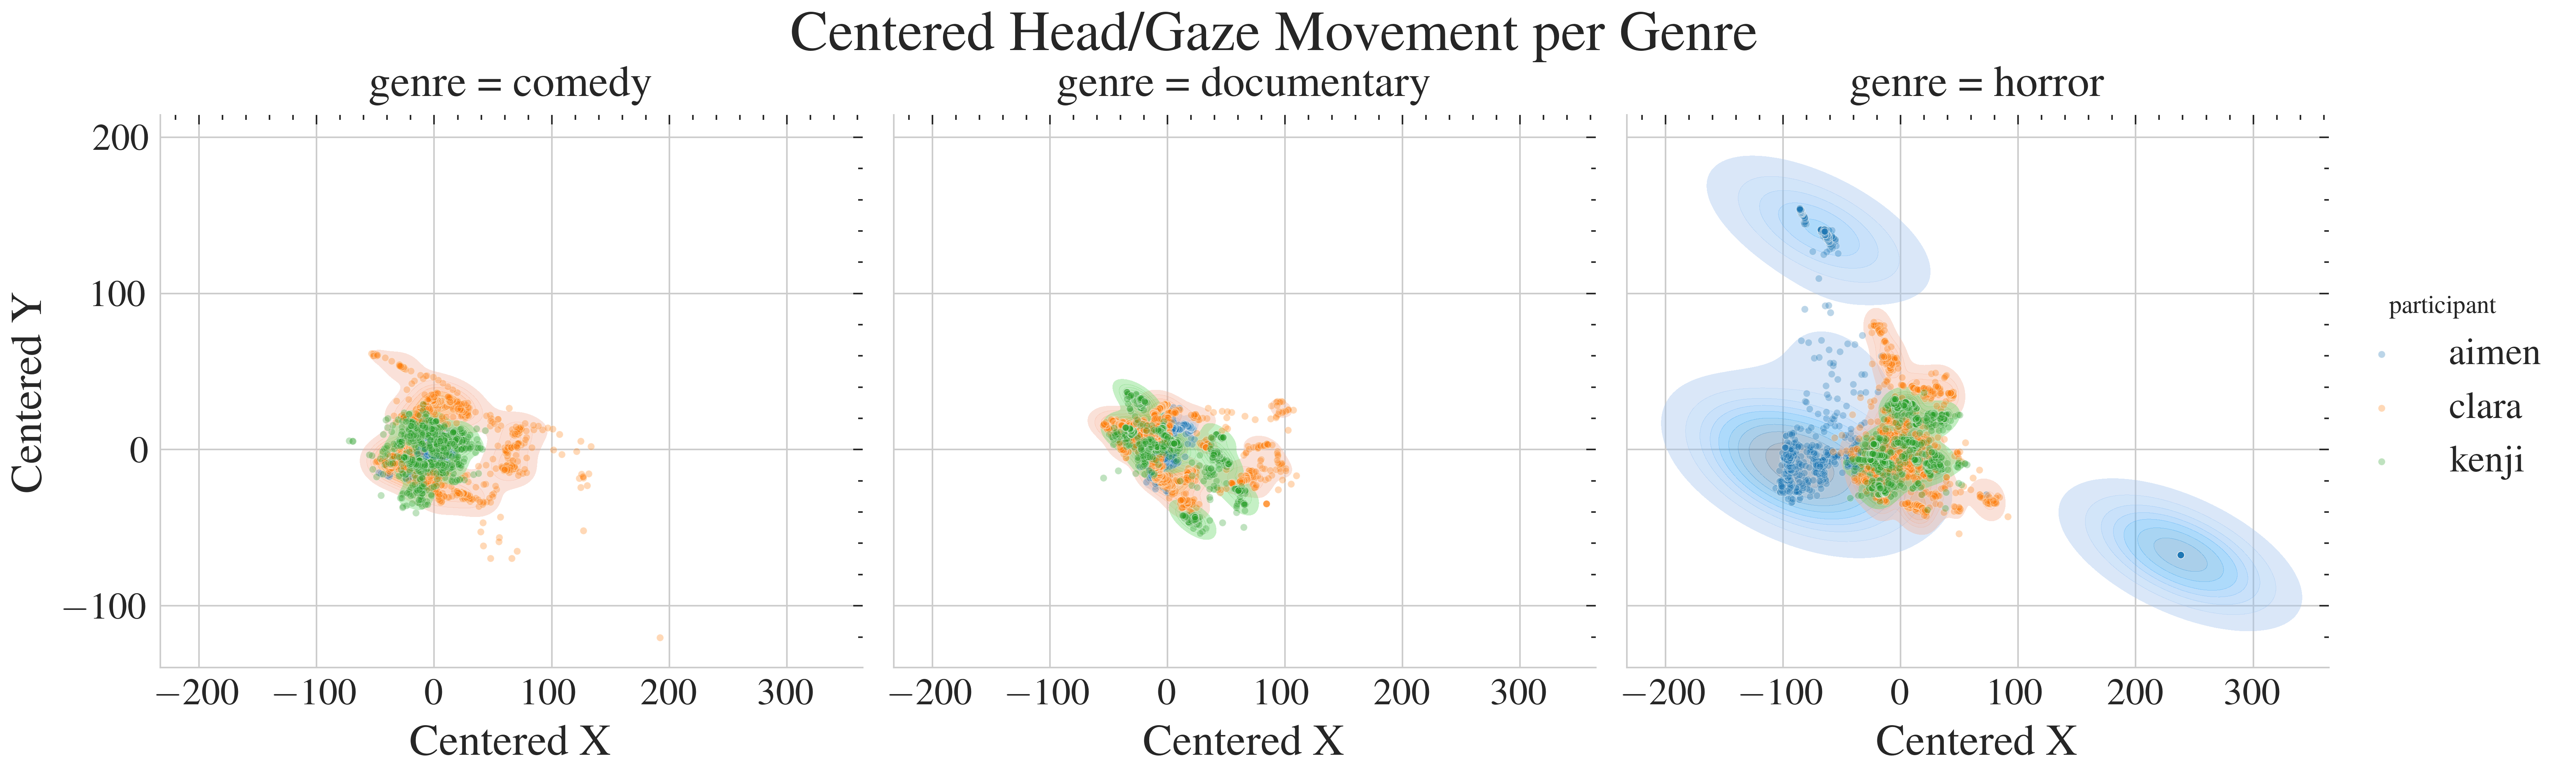

In [23]:
# Center coordinates per participant and genre
df_centered = df.copy()
means = df.groupby(['participant', 'genre'])[['x_coordinate', 'y_coordinate']].transform('mean')
df_centered['x_centered'] = df['x_coordinate'] - means['x_coordinate']
df_centered['y_centered'] = df['y_coordinate'] - means['y_coordinate']

# Use FacetGrid on centered coordinates
g = sns.FacetGrid(df_centered, col='genre', hue='participant', palette='tab10', height=3.5, aspect=1)
g.map_dataframe(sns.kdeplot, x='x_centered', y='y_centered', fill=True, alpha=0.4, thresh=0.05)
g.map_dataframe(sns.scatterplot, x='x_centered', y='y_centered', s=5, alpha=0.3)
g.set_axis_labels('Centered X', 'Centered Y')
g.add_legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Centered Head/Gaze Movement per Genre')
plt.show()


## Pupil Iris Ratio

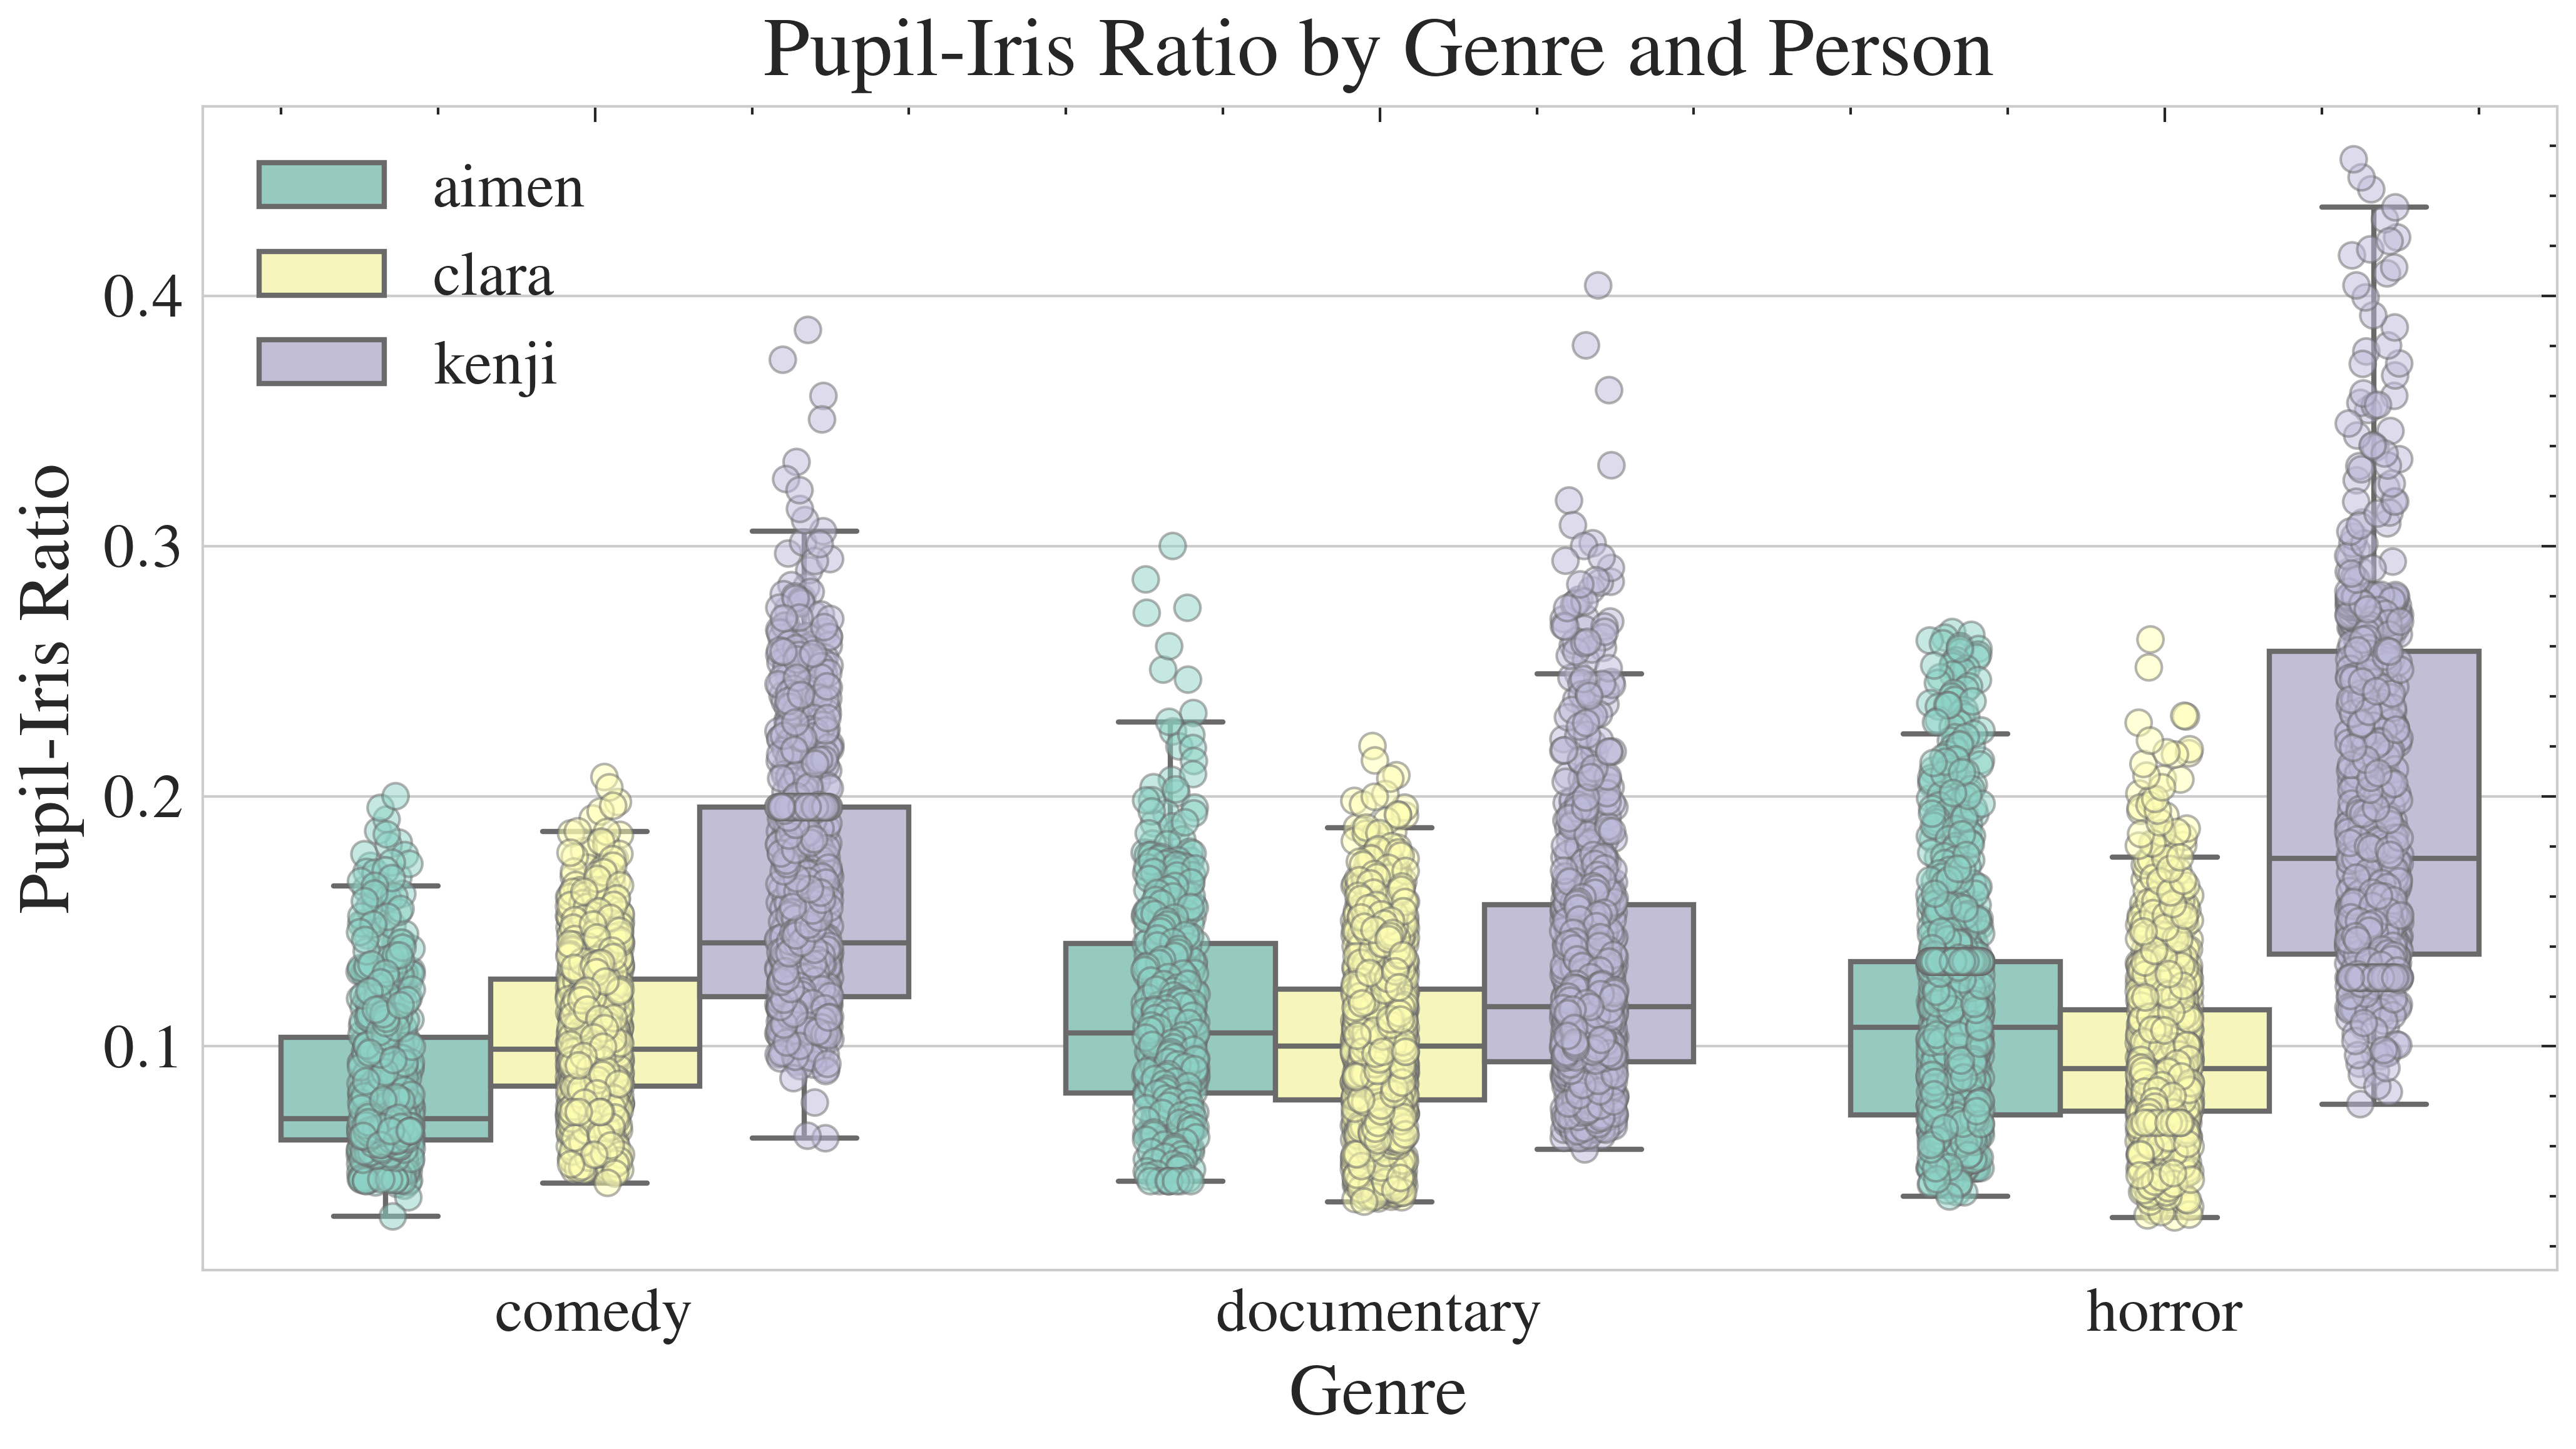

In [24]:
plt.figure(figsize=(7, 4))

# Plot boxplot
sns.boxplot(
    data=df,
    x='genre',
    y='pupil_iris_ratio',
    hue='participant',
    palette='Set3',
    showfliers=False
)

# Plot stripplot
strip = sns.stripplot(
    data=df,
    x='genre',
    y='pupil_iris_ratio',
    hue='participant',
    dodge=True,
    palette='Set3',
    alpha=0.5,
    linewidth=0.5,
    edgecolor='gray'
)

# Remove the second legend
handles, labels = strip.get_legend_handles_labels()
plt.legend(handles[:len(df['participant'].unique())], labels[:len(df['participant'].unique())])

plt.title('Pupil-Iris Ratio by Genre and Person')
plt.xlabel('Genre')
plt.ylabel('Pupil-Iris Ratio')
plt.tight_layout()


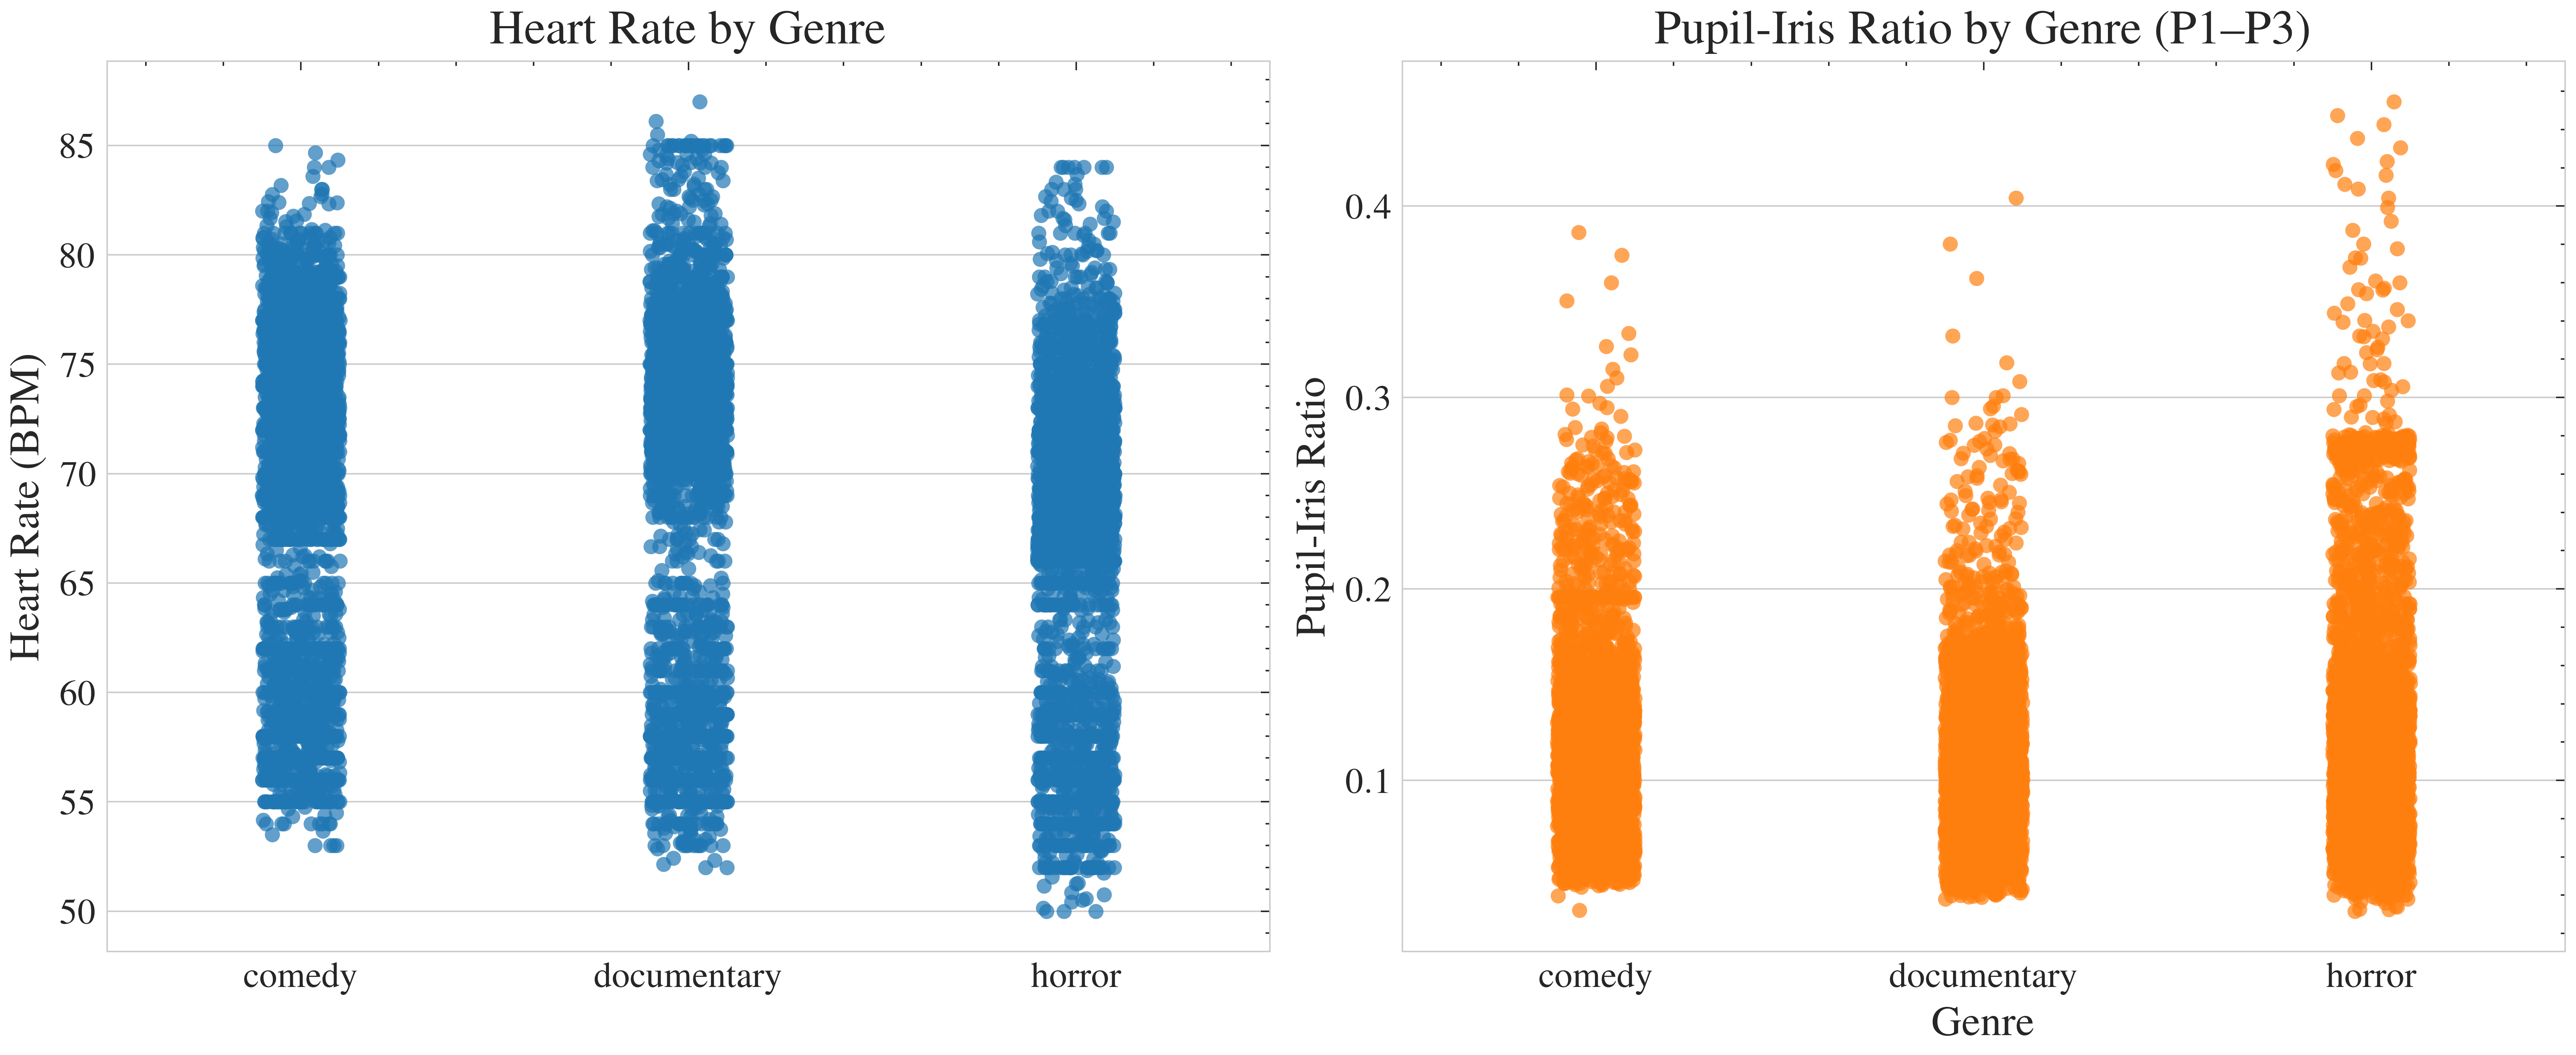

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Heart rate plot (all participants)
sns.stripplot(
    data=df,
    x='genre',
    y='heart_rate',
    ax=axes[0],
    color='tab:blue',
    alpha=0.7,
    jitter=True
)
axes[0].set_title('Heart Rate by Genre')
axes[0].set_xlabel('')
axes[0].set_ylabel('Heart Rate (BPM)')

# Pupil-iris ratio plot (Participants 1, 2, 3)
sns.stripplot(
    data=df,
    x='genre',
    y='pupil_iris_ratio',
    ax=axes[1],
    color='tab:orange',
    alpha=0.7,
    jitter=True
)
axes[1].set_title('Pupil-Iris Ratio by Genre (P1–P3)')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Pupil-Iris Ratio')

plt.tight_layout()
# plt.savefig('../data_analysis/hr_pis.png')
plt.show()
